### Precision, Recall and F1-score

In [39]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
%matplotlib inline

In [4]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [6]:
data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [9]:
data.year.unique()

array([2007, 2006, 2015, 2014, 2001, 2008, 1977, 1992, 2010, 2012, 2009,
       1981, 2016, 1995, 2011, 2013])

In [16]:
data.drop(labels=['song', 'year','lyrics','genre'], axis=1, inplace=True)

In [19]:
X_train = data.iloc[:,1:]

In [22]:
y = pd.get_dummies(y_train) 

In [26]:
new_y = y_train.replace({'abba':0, 'blind-guardian':1, 'gangstarr':2})

In [28]:
new_y_train = new_y

In [20]:
y_train = data.artist

In [ ]:
clf = tree.DecisionTreeClassifier(X_train, y_train)

In [31]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()

In [35]:
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train, y_train)
    #test_score = clf.score(X_test, y_test)
    # Делаем кросс-валидацию
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    # Делаем временный дата-фрейм что бы туда закидывать данные 
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score], 
                                    #'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
#   Добавляем все в оснвной датафрейм
    scores_data = scores_data.append(temp_score_data)

In [37]:
score_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                    value_vars=['train_score', 'cross_val_score'],
                    var_name='set_type', value_name='score')

In [ ]:
precision_score(Xaverage='micro')

#### great solution

`import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
depth = 1
while True:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    precision = precision_score(y_test, predictions, average='micro')
    if precision > 0.78:
        break
    else:
        depth += 1`
        

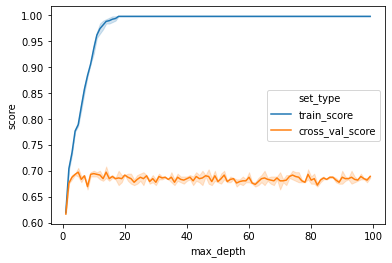

In [38]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)

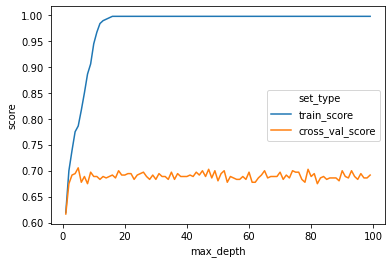

In [34]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)